<a href="https://colab.research.google.com/github/DivyanshRana1515/Deep-Learning-Lab-/blob/main/Exp_2_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [12]:
# 2. Data collection & preprocessing
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)  # simple 2-class dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# 3. Model building (ANN)
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(2,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 4. Training
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0087 
Test Accuracy: 1.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


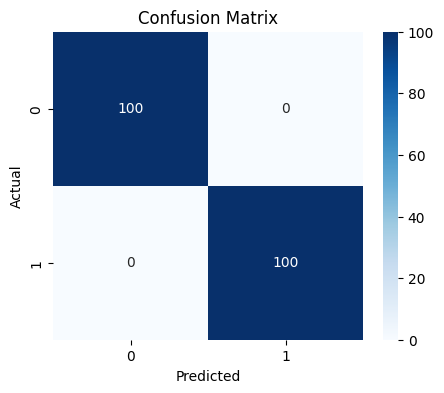


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
# 5. Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

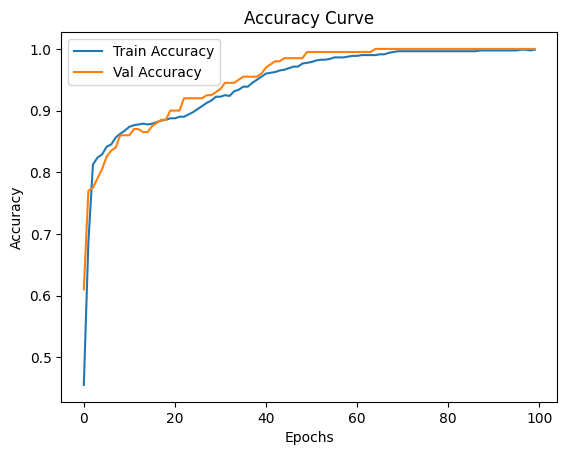

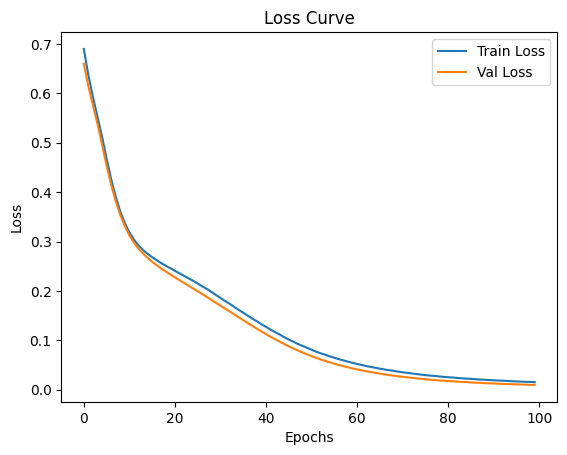

In [16]:
# 6. Accuracy & Loss Plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

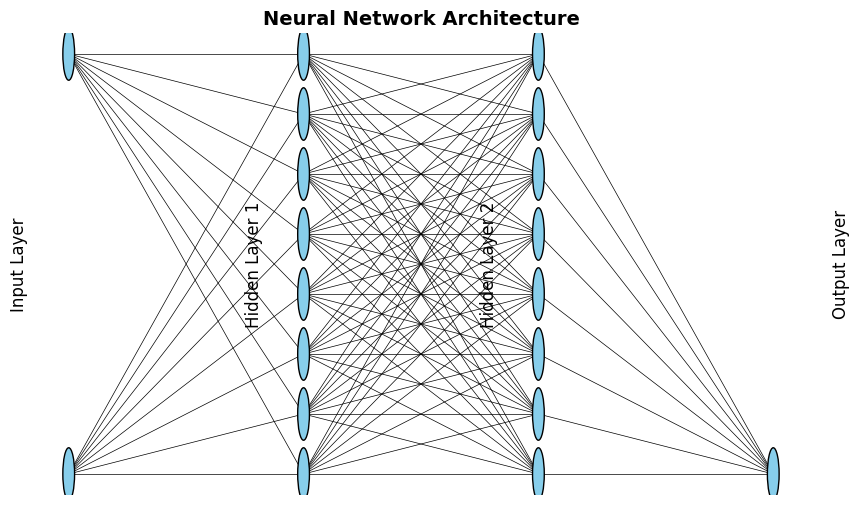

In [17]:
# 7. ANN Architecture Visualization (Neural Network-like Structure)
# =============================
import matplotlib.pyplot as plt

# Define architecture: input(2), hidden1(8), hidden2(8), output(1)
layer_sizes = [2, 8, 8, 1]

fig, ax = plt.subplots(figsize=(10,6))
ax.axis('off')
ax.set_title("Neural Network Architecture", fontsize=14, fontweight='bold')

# Store neuron coordinates
neuron_coords = []

# Draw neurons
for i, layer_size in enumerate(layer_sizes):
    x = i * 2  # spacing between layers
    y_positions = np.linspace(0.1, 0.9, layer_size)
    layer_coords = []
    for y in y_positions:
        circle = plt.Circle((x, y), 0.05, color='skyblue', ec='black', zorder=3)
        ax.add_artist(circle)
        layer_coords.append((x, y))
    neuron_coords.append(layer_coords)

# Draw connections
for i in range(len(neuron_coords)-1):
    for (x1, y1) in neuron_coords[i]:
        for (x2, y2) in neuron_coords[i+1]:
            ax.plot([x1, x2], [y1, y2], 'k-', lw=0.5, zorder=1)

# Add layer labels
ax.text(-0.5, 0.5, "Input Layer", fontsize=12, va='center', rotation=90)
ax.text(2-0.5, 0.5, "Hidden Layer 1", fontsize=12, va='center', rotation=90)
ax.text(4-0.5, 0.5, "Hidden Layer 2", fontsize=12, va='center', rotation=90)
ax.text(6.5, 0.5, "Output Layer", fontsize=12, va='center', rotation=90)

plt.show()